In [9]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [10]:
x_train = np.array([1.0,2.0])
y_train = np.array([300.0,500.0])

In [11]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w*(x[i]) + b
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = 1/(2*m) * cost
    return total_cost

def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i])*(x[i])
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

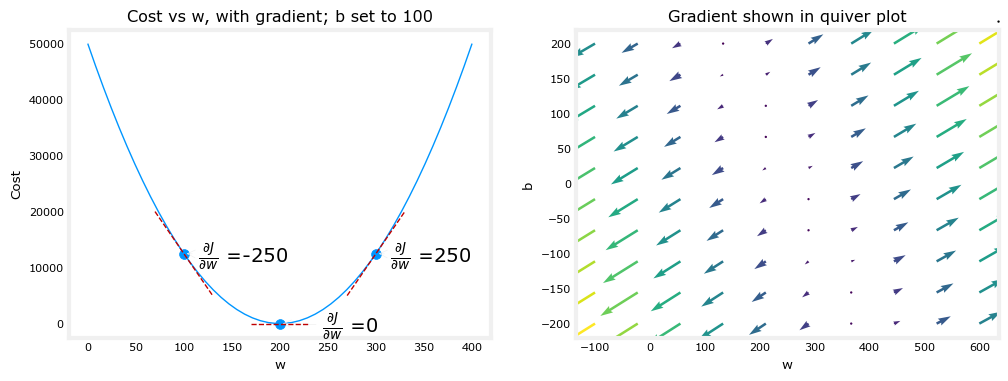

In [12]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [26]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,compute_cost,compute_gradient):
    """
    num_iters: number of iterations to run gradient descent
    alpha: learning rate
    
    """
    w = copy.deepcopy(w_in) #to avoid modifying global w_in
    #create arrays to store cost cost J and w's foreach iteration
    J_arr=[]
    p_arr=[]
    b = b_in
    w = w_in
    for i in range(num_iters):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        
        if i < 100000:
            J_arr.append(compute_cost(x,y,w,b))
            p_arr.append([w,b])
        
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_arr[-1]:0.2e} ",f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w,b,J_arr,p_arr

In [28]:
#Example of training linear regression model using Batch Gradient Descent
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 0.2
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")


Iteration    0: Cost 8.42e+03  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  1.300e+02, b: 8.00000e+01
Iteration 1000: Cost 2.45e-12  dj_dw: -3.189e-07, dj_db:  5.160e-07   w:  2.000e+02, b: 1.00000e+02
Iteration 2000: Cost 4.39e-25  dj_dw: -1.137e-13, dj_db:  2.274e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 3000: Cost 2.02e-26  dj_dw: -5.684e-14, dj_db:  2.842e-14   w:  2.000e+02, b: 1.00000e+02
Iteration 4000: Cost 2.02e-26  dj_dw: -5.684e-14, dj_db:  2.842e-14   w:  2.000e+02, b: 1.00000e+02
Iteration 5000: Cost 2.02e-26  dj_dw: -5.684e-14, dj_db:  2.842e-14   w:  2.000e+02, b: 1.00000e+02
Iteration 6000: Cost 2.02e-26  dj_dw: -5.684e-14, dj_db:  2.842e-14   w:  2.000e+02, b: 1.00000e+02
Iteration 7000: Cost 2.02e-26  dj_dw: -5.684e-14, dj_db:  2.842e-14   w:  2.000e+02, b: 1.00000e+02
Iteration 8000: Cost 2.02e-26  dj_dw: -5.684e-14, dj_db:  2.842e-14   w:  2.000e+02, b: 1.00000e+02
Iteration 9000: Cost 2.02e-26  dj_dw: -5.684e-14, dj_db:  2.842e-14   w:  2.000e+02, b: 1.00000e+02


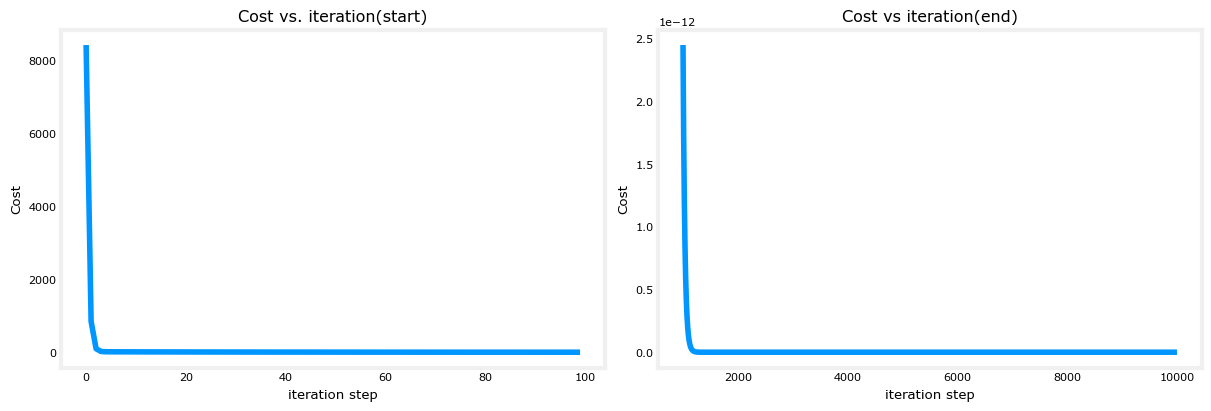

In [30]:
#Cost v/s iteration graph
fig, (ax1,ax2) = plt.subplots(1,2,constrained_layout = True,figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000+np.arange(len(J_hist[1000:])),J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)"); ax2.set_title("Cost vs iteration(end)")
ax1.set_ylabel('Cost') ; ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step') ; ax2.set_xlabel('iteration step')
plt.show()

In [31]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


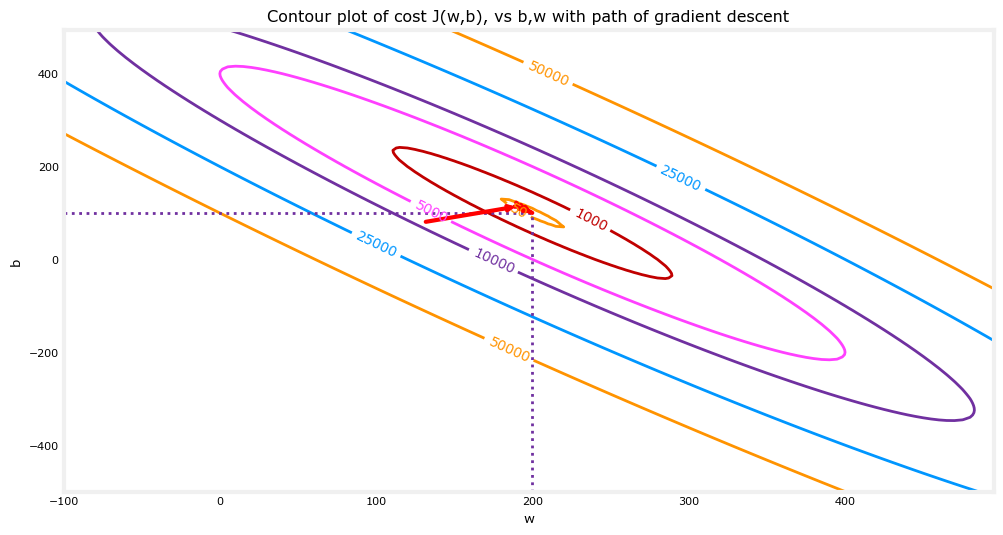

In [32]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

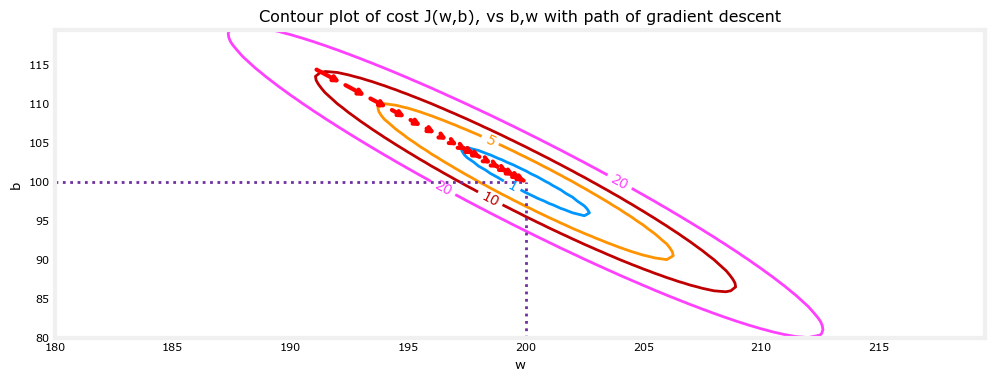

In [33]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],contours=[1,5,10,20],resolution=0.5)

In [34]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04


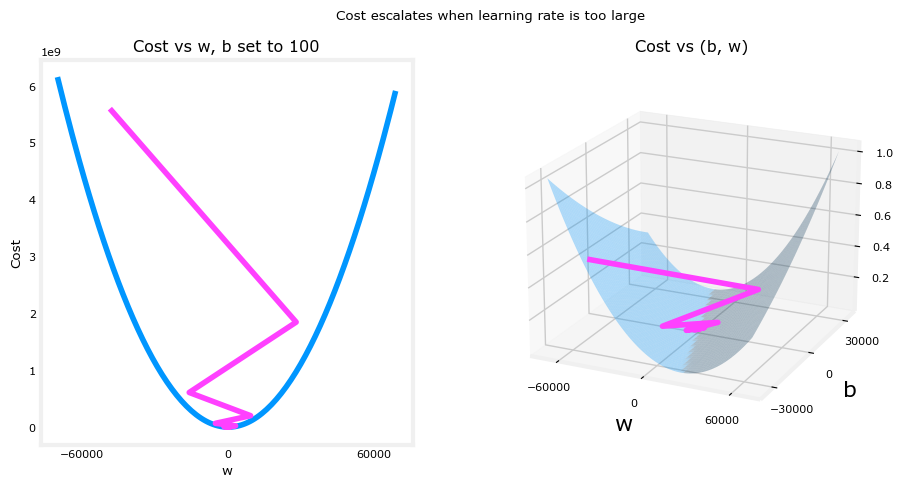

In [35]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()